# **1. Premiers pas : Convolution avec Python**

In [92]:
import numpy as np
from skimage import data,io,img_as_float32
import matplotlib as plt
from scipy import signal
from matplotlib.pyplot import imshow, get_cmap
import matplotlib.pyplot as plt
def displayTwoBaWImages(img1, img2):
    _, axes = plt.subplots(ncols=2)
    axes[0].imshow(img1, cmap=plt.get_cmap('gray'))
    axes[1].imshow(img2, cmap=plt.get_cmap('gray'))


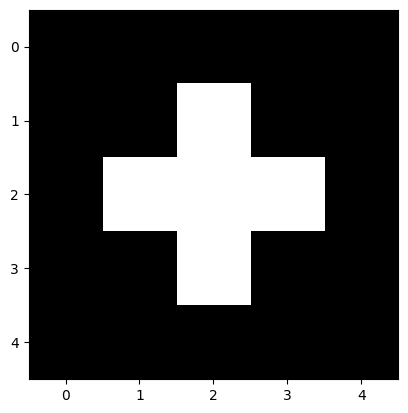

In [2]:
image_test = np.array([[0,0,0,0,0],
                      [0,0,1,0,0],
                      [0,1,1,1,0],
                      [0,0,1,0,0],
                      [0,0,0,0,0]])

imshow(image_test,cmap=get_cmap('gray'))

In [3]:
##the kernel is used to perform a 3x3 box blur on an image##
kernel = np.ones((3,3), np.float32)/2

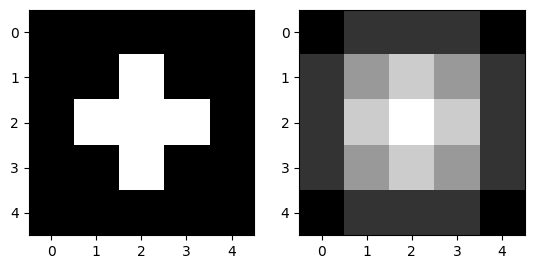

In [10]:
#mode='same':the size of the output (imgconvol) is the same size as the input image (image_test)
#boundary='fill':the missing values at the edges of the image are filled with the fillvalue parameter.
#fillvalue=0: This parameter sets the value used to fill the missing values at the edges of the image as 0.
imgconvol = signal.convolve2d(image_test,kernel,mode='same',boundary='fill',fillvalue=0)
displayTwoBaWImages(image_test, imgconvol)

In [11]:
print(imgconvol)
print(imgconvol.shape)
print(image_test.shape)
#as noticed image_test ans imageconvol have the sama dimensions

[[0.  0.5 0.5 0.5 0. ]
 [0.5 1.5 2.  1.5 0.5]
 [0.5 2.  2.5 2.  0.5]
 [0.5 1.5 2.  1.5 0.5]
 [0.  0.5 0.5 0.5 0. ]]


# **2.DETECTION DE CONTOURS**

In [24]:
kernel_contour = np.array([[0,1,0],
                          [1,-4,1],
                          [0,1,0]])

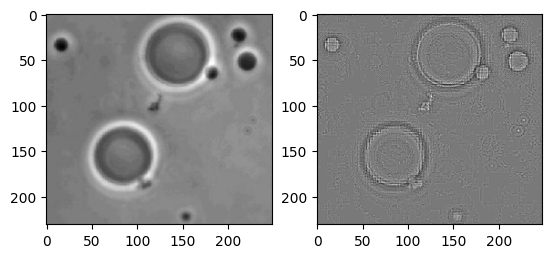

In [25]:
#boundary="symm" -> symmetric padding{the missing values are filled by reflecting the image values.}
import cv2 as cv
path = "/content/cell_image.png"
img = cv.imread(path)
grayimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgconvol = signal.convolve2d(grayimg,
kernel_contour,
boundary='symm',
mode='same')
displayTwoBaWImages(grayimg, imgconvol)
imshow(imgconvol, cmap=get_cmap('gray'))

In [26]:
print(grayimg.shape)
print(imgconvol)
print(imgconvol.shape)
#as noticed imgconvol and grayimg have the same dimensions

(231, 248)
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 2 -1  0 ...  0  0  0]
 [-2  0  0 ...  0  0  0]
 [ 2 -1  0 ...  0  0  0]]
(231, 248)


# **3. Augmentation de contraste**

In [27]:
kernel_inccontrast = np.array([[0,0,0,0,0],
                              [0,0,-1,0,0],
                              [0,-1,5,-1,0],
                              [0,0,-1,0,0],
                              [0,0,0,0,0]])

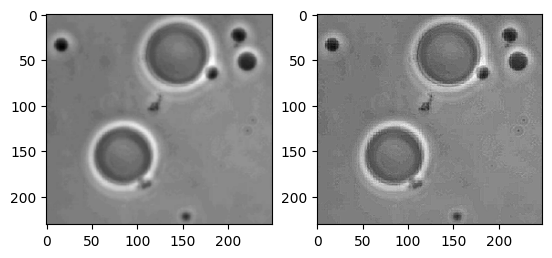

In [29]:
imgcontrast = signal.convolve2d(grayimg,
kernel_inccontrast,
boundary='symm',
mode='same')
displayTwoBaWImages(grayimg, imgcontrast)

# **4.Filtre Gaussien**

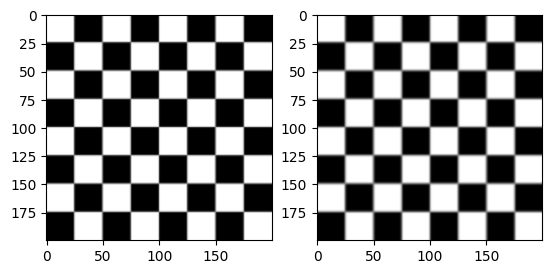

In [30]:
kernel = np.array([[0,0,0,0,0],
                  [0,1,2,1,0],
                  [0,2,4,2,0],
                  [0,1,2,1,0],
                  [0,0,0,0,0]])/16

img = signal.convolve2d(data.checkerboard(),kernel,boundary='symm',mode='same')

displayTwoBaWImages(data.checkerboard(), img)

# **5.Filtrage différentiel**

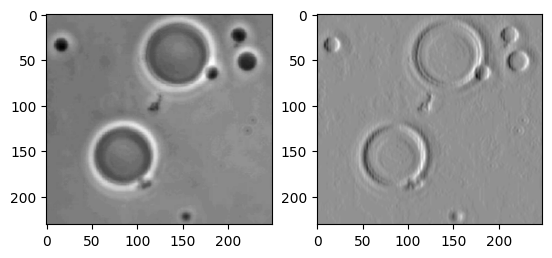

In [31]:
#prewitt in one direction
kernel = np.array([[1,0,-1],
                  [1,0,-1,],
                  [1,0,-1,]])
img = signal.convolve2d(grayimg,kernel,boundary='symm',mode='same')
displayTwoBaWImages(grayimg, img)

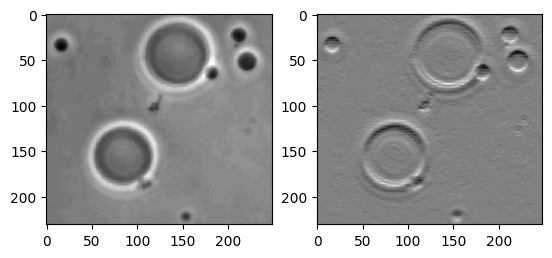

In [33]:
#Prewitt in the other direction
kernel = np.array([[1,1,1],
                  [0,0,0],
                  [-1,-1,-1]])
img = signal.convolve2d(grayimg,kernel,boundary='symm',mode='same')
displayTwoBaWImages(grayimg, img)

# **Travail demandé**
**1-**Chargez l’image du cameraman disponible dans skimage.data

**2-** Appliquez sur cette image un bruit gaussien additif de variance 0.01 (nommez cette image
« imGauss » et l’affichez). Vous pouvez utiliser la fonction random_noise de skimage.

**3-** Appliquez sur l’image d’origine un autre bruit de type salt and pepper (nommez cette image
« imSP ». Vous pouvez utiliser la fonction random_noise de skimage.

**4-** Tentez de restaurer les images d’origine en appliquant les filtres adéquats. Au lieu de créer vous-
même les noyaux, utilisez les fonctions prédéfinies de scipy.ndimage pour effectuer le filtrage adéquat.

**5-** A votre avis, est-ce que les images résultantes dans les deux cas ont été convenablement restaurées ? 
Evaluez les restaurations en calculant les deux mesures de qualité PSNR et MSE dans les deux cas. Commentez.

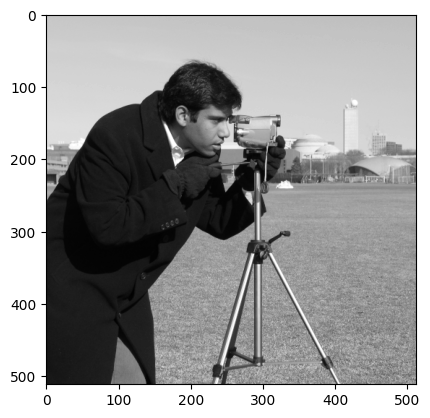

In [94]:
camera_man=data.camera()
imshow(camera_man, cmap=get_cmap('gray'))
camera_man=img_as_float32(camera_man)

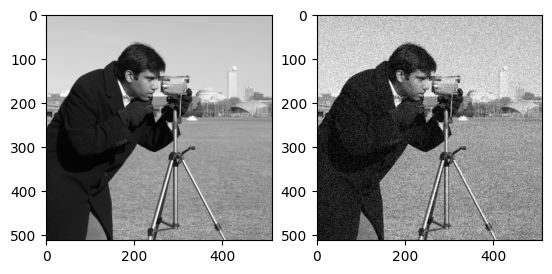

In [95]:
##NOTES
#varfloat, optional
#Variance of random distribution. In gaussian distribution it is by default : 0.01
from skimage.util import random_noise
imGauss=random_noise(camera_man, mode='gaussian',var=0.01)
displayTwoBaWImages(camera_man, imGauss)

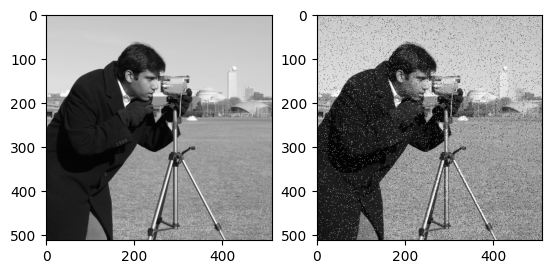

In [96]:
imSP=random_noise(camera_man, mode='s&p')
displayTwoBaWImages(camera_man, imSP)

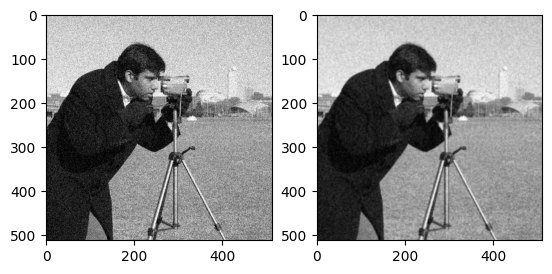

In [97]:
from scipy.ndimage import gaussian_filter
#Sigma est le facteur de lissage de l'image
imGaussRestauree=gaussian_filter(imGauss, sigma=1)
displayTwoBaWImages(imGauss, imGaussRestauree)

In [104]:
from skimage.metrics import  mean_squared_error , peak_signal_noise_ratio
MSE_Gauss=mean_squared_error(camera_man,imGaussRestauree)
PSNR_Gauss=peak_signal_noise_ratio(camera_man,imGaussRestauree)
print('MSE_Gauss = ',MSE_Gauss)
print('PSNR_Gauss en DB =',PSNR_Gauss)

MSE_Gauss =  0.0019235685140936082
PSNR_Gauss en DB = 27.15892340283672


<ipython-input-104-b429b3e408ed>:3: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  PSNR_Gauss=peak_signal_noise_ratio(camera_man,imGaussRestauree)


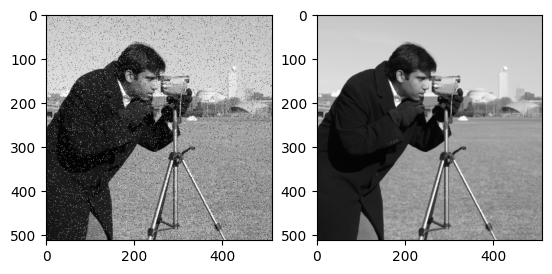

In [105]:
from scipy.ndimage import median_filter
imSPRestauree=median_filter(imSP,size=3)
displayTwoBaWImages(imSP, imSPRestauree)

In [106]:
MSE_SP=mean_squared_error(camera_man,imSPRestauree)
PSNR_SP=peak_signal_noise_ratio(camera_man,imSPRestauree)
print('MSE_SP = ',MSE_SP)
print('PSNR_SP en DB = ',PSNR_SP)

MSE_SP =  0.000969681692544376
PSNR_SP en DB =  30.13370803731921


**These values prove that the restoration with the median filter has better quality than the restoration with the gaussian filter.(by the comparison between thr PSNR_SP and PSNR_Gauss).
The PSNR_SP has a higher value (30.133 DB) and the gaussian filter has a value of 27.158 DB wich also gives the squared mean error a meaning.
In both cases the MSE is so small => the restoration is well done.**